In [10]:
import pandas as pd
import numpy as np
import re
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import autocorrelation_plot

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import operator
# from ast import literal_eval
# from collections import Counter

ModuleNotFoundError: No module named 'seaborn'

In [3]:
billboard = pd.read_csv("./datasets/billboard100.csv")
audioFeature2017 = pd.read_csv("./datasets/a2017spoti.csv")
audioFeature2018 = pd.read_csv("./datasets/a2018spoti.csv")
audioFeature0 = pd.read_csv("./datasets/a19000spoti.csv")
audioFeature1 = pd.read_csv("./spotify_2018-2019.csv")

In [4]:
def get_featuring(name):
    repls = {'X' : '|', 'x' : '|', '&' : '|', '+':'|', ',':'|', 'Feat.':'|','With':'|','Featuring':'|'}
    if name in ['Earth, Wind & Fire','Blood, Sweat & Tears']:
        pass
    else:
        name = reduce(lambda a, kv: a.replace(*kv), repls.items(), name)
        if '|' in name:
            name = name[2+name.find("|"):]
    return name

def name_slicer(name):
    repls = {'X ' : 'Featuring', 'x ' : 'Featuring', '&' : 'Featuring', '+':'Featuring', ',':'Featuring', 'Feat.':'Featuring','With':'Featuring'}
    if name in ['Earth, Wind & Fire','Blood, Sweat & Tears']:
        pass
    else:
        name = reduce(lambda a, kv: a.replace(*kv), repls.items(), name)
        if 'Featuring' in name:
            name = name[:name.find("Featuring")-1]
    return name

In [5]:
billboard.replace('-',np.nan,inplace=True)
billboard['artist1'] = billboard['artist'].apply(lambda x: name_slicer(x))
billboard['featuring'] = billboard['artist'].apply(lambda x: get_featuring(x))
billboard['year'] = pd.DatetimeIndex(billboard['date_']).year
billboard['month'] = pd.DatetimeIndex(billboard['date_']).month
billboard.last_week_rank = billboard['last_week_rank'].astype('float64')
billboard['rank_delta'] = billboard.last_week_rank - billboard['rank']
billboard['unique'] = billboard.artist + ' ' + billboard.title
audioFeature1['track'] = audioFeature1['track'].str.title()
audioFeature1['unique'] = audioFeature1.artist + '|' + audioFeature1.track
audioFeature1 = audioFeature1.drop_duplicates('unique')

In [6]:
a = billboard[billboard['date_']>='2018-01-01']
a

,artist,date_,last_week_rank,peak_rank,rank,title,weeks_on_chart,artist1,featuring,year,month,rank_delta,unique
0,Lil Nas X Featuring Billy Ray Cyrus,2019-04-13,15.0,1.0,1,Old Town Road,5.0,Lil Nas,| Billy Ray Cyrus,2019,4,14.0,Lil Nas X Featuring Billy Ray Cyrus Old Town Road
1,Post Malone & Swae Lee,2019-04-13,3.0,1.0,2,Sunflower (Spider-Man: Into The Spider-Verse),24.0,Post Malone,Swae Lee,2019,4,1.0,Post Malone & Swae Lee Sunflower (Spider-Man: ...
2,Ariana Grande,2019-04-13,1.0,1.0,3,7 Rings,11.0,Ariana Grande,Ariana Grande,2019,4,-2.0,Ariana Grande 7 Rings
3,Post Malone,2019-04-13,2.0,2.0,4,Wow.,15.0,Post Malone,Post Malone,2019,4,-2.0,Post Malone Wow.
4,Halsey,2019-04-13,4.0,1.0,5,Without Me,26.0,Halsey,Halsey,2019,4,-1.0,Halsey Without Me
5,Cardi B & Bruno Mars,2019-04-13,5.0,3.0,6,Please Me,7.0,Cardi B,Bruno Mars,2019,4,-1.0,Cardi B & Bruno Mars Please Me
6,Billie Eilish,2019-04-13,NaN,NaN,7,Bad Guy,NaN,Billie Eilish,Billie Eilish,2019,4,NaN,Billie Eilish Bad Guy
7,Jonas Brothers,2019-04-13,9.0,1.0,8,Sucker,5.0,Jonas Brothers,Jonas Brothers,2019,4,1.0,Jonas Brothers Sucker
8,Marshmello & Bastille,2019-04-13,6.0,2.0,9,Happier,33.0,Marshmello,Bastille,2019,4,-3.0,Marshmello & Bastille Happier
9,J. Cole,2019-04-13,7.0,4.0,10,Middle Child,11.0,J. Cole,J. Cole,2019,4,-3.0,J. Cole Middle Child


In [8]:
audioFeature1

,artist,track,genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,unique
0,Ariana Grande,7 Rings,"['dance pop', 'pop', 'post-teen pop']",0.778,0.3170,1,-10.732,0,0.3340,0.592000,0.000000,0.0881,0.3270,140.048,audio_features,6ocbgoVGwYJhOv1GgI9NsF,spotify:track:6ocbgoVGwYJhOv1GgI9NsF,https://api.spotify.com/v1/tracks/6ocbgoVGwYJh...,https://api.spotify.com/v1/audio-analysis/6ocb...,178627,4,Ariana Grande|7 Rings
1,Billie Eilish,Bad Guy,['electropop'],0.708,0.4180,0,-10.998,1,0.3680,0.308000,0.093000,0.1000,0.5780,131.926,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,Billie Eilish|Bad Guy
2,Lady Gaga,Shallow,"['dance pop', 'pop']",0.572,0.3850,7,-6.362,1,0.0308,0.371000,0.000000,0.2310,0.3230,95.799,audio_features,2VxeLyX666F8uXCJ0dZF8B,spotify:track:2VxeLyX666F8uXCJ0dZF8B,https://api.spotify.com/v1/tracks/2VxeLyX666F8...,https://api.spotify.com/v1/audio-analysis/2Vxe...,215733,4,Lady Gaga|Shallow
3,Blueface,Thotiana,"['cali rap', 'trap music']",0.906,0.3820,10,-12.890,0,0.2690,0.180000,0.000000,0.1130,0.3910,104.025,audio_features,3oh6SCCeLuXhFpEyepla6G,spotify:track:3oh6SCCeLuXhFpEyepla6G,https://api.spotify.com/v1/tracks/3oh6SCCeLuXh...,https://api.spotify.com/v1/audio-analysis/3oh6...,129264,4,Blueface|Thotiana
4,Meek Mill,Going Bad (Feat. Drake),"['hip hop', 'philly rap', 'pop', 'pop rap', 'r...",0.889,0.4960,4,-6.365,0,0.0905,0.259000,0.000000,0.2520,0.5440,86.003,audio_features,2IRZnDFmlqMuOrYOLnZZyc,spotify:track:2IRZnDFmlqMuOrYOLnZZyc,https://api.spotify.com/v1/tracks/2IRZnDFmlqMu...,https://api.spotify.com/v1/audio-analysis/2IRZ...,180522,4,Meek Mill|Going Bad (Feat. Drake)
5,Khalid,Better,['pop'],0.692,0.5520,0,-9.543,0,0.0497,0.050300,0.165000,0.1360,0.1500,98.028,audio_features,339Y993TrFyWyO438be0RY,spotify:track:339Y993TrFyWyO438be0RY,https://api.spotify.com/v1/tracks/339Y993TrFyW...,https://api.spotify.com/v1/audio-analysis/339Y...,229400,4,Khalid|Better
6,Panic! At The Disco,High Hopes,"['emo', 'modern rock', 'pop punk']",0.579,0.9040,5,-2.729,1,0.0618,0.193000,0.000000,0.0640,0.6810,82.014,audio_features,1rqqCSm0Qe4I9rUvWncaom,spotify:track:1rqqCSm0Qe4I9rUvWncaom,https://api.spotify.com/v1/tracks/1rqqCSm0Qe4I...,https://api.spotify.com/v1/audio-analysis/1rqq...,190947,4,Panic! At The Disco|High Hopes
7,Ariana Grande,"Break Up With Your Girlfriend, I'M Bored","['dance pop', 'pop', 'post-teen pop']",0.726,0.5540,5,-5.290,0,0.0917,0.042100,0.000000,0.1060,0.3350,169.999,audio_features,4kV4N9D1iKVxx1KLvtTpjS,spotify:track:4kV4N9D1iKVxx1KLvtTpjS,https://api.spotify.com/v1/tracks/4kV4N9D1iKVx...,https://api.spotify.com/v1/audio-analysis/4kV4...,190440,4,"Ariana Grande|Break Up With Your Girlfriend, I..."
8,Travis Scott,Sicko Mode,"['pop', 'pop rap', 'rap', 'trap music']",0.834,0.7300,8,-3.714,1,0.2220,0.005130,0.000000,0.1240,0.4460,155.008,audio_features,2xLMifQCjDGFmkHkpNLD9h,spotify:track:2xLMifQCjDGFmkHkpNLD9h,https://api.spotify.com/v1/tracks/2xLMifQCjDGF...,https://api.spotify.com/v1/audio-analysis/2xLM...,312820,4,Travis Scott|Sicko Mode
9,YNW Melly,Murder On My Mind,"['rap', 'trap music']",0.759,0.7300,0,-7.985,0,0.0516,0.145000,0.000003,0.1100,0.7400,115.007,audio_features,7eBqSVxrzQZtK2mmgRG6lC,spotify:track:7eBqSVxrzQZtK2mmgRG6lC,https://api.spotify.com/v1/tracks/7eBqSVxrzQZt...,https://api.spotify.com/v1/audio-analysis/7eBq...,268434,4,YNW Melly|Murder On My Mind


In [513]:
def countWord(string_1):
    '''
    1. count the number of frequencies of each word occur.
    2. case insensitive
    3. remove all punctuations
    
    Arguments:
    string_1: string to be checked
    
    Returns:
    hist: dictionary of each word
    '''
    # punctuation list
    exclude = list(string.punctuation)
    # case insensitive
    string_1 = string_1.upper().lower()
    
    # remove punctuations
    temp_s = ""
    for i in string_1:
        if i in exclude:
            temp_s = temp_s + ""
        else:
            temp_s = temp_s + i
    # split()        
    for word in ['raegaeton','r&b','k-pop','adult standards','children','techno','hip hop','country','rock','ccm','rap']:
        if 'rb' in temp_s:
            return 'r&b'
        elif 'kpop' in temp_s:
            return 'k-pop'
        elif word in temp_s:
            hist = temp_s[temp_s.find(word):temp_s.find(word)+len(word)]
            return hist
        elif 'hip hop' in temp_s:
            return 'hip hop'
        elif 'rap' in temp_s:
            return 'rap'
        else:
    # count in dictionary
            hist={}
            for i in temp_s.split():
                if i in hist:
                    hist[i] += 1
                else:
                    hist[i] = 1
    return max(hist, key=hist.get)

In [605]:
def genreCount(string_1):
    clean = string_1[1:-1].replace("hip hop", "hip-hop").replace("'","")
    pattern = re.compile("^\s+|\s*,\s*|\s+$")
    word_list = ([x for x in pattern.split(clean) if x])
    result = {}
    for word in word_list:
        if word in result:
            result[word] += 1
        else:
            result[word] = 1
    
    return result
print(genreCount(f))

{'alternative r&b': 1, 'hip-hop': 1, 'deep pop r&b': 1, 'indie r&b': 1, 'pop': 1, 'r&b': 1, 'urban contemporary': 1}


In [532]:
f = "['alternative r&b', 'hip hop','deep pop r&b', 'indie r&b', 'pop', 'r&b', 'urban contemporary']"

In [596]:
for i in audioFeature1['genres']:
    print((i))
    print(countWord(i))


['dance pop', 'pop', 'post-teen pop']
pop
['electropop']
electropop
['dance pop', 'pop']
pop
['cali rap', 'trap music']
rap
['hip hop', 'philly rap', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap music']
hip hop
['pop']
pop
['emo', 'modern rock', 'pop punk']
rock
['dance pop', 'pop', 'post-teen pop']
pop
['pop', 'pop rap', 'rap', 'trap music']
rap
['rap', 'trap music']
rap
['atl hip hop', 'rap', 'trap music']
hip hop
['pop']
pop
['dance pop', 'pop', 'post-teen pop']
pop
['electropop']
electropop
['contemporary country', 'country road']
country
['australian pop', 'pop']
pop
['electropop']
electropop
['atl hip hop', 'atl trap', 'rap', 'trap music']
hip hop
['electropop']
electropop
['ccm', 'christian music', 'worship']
ccm
['pop', 'rap']
rap
['electropop']
electropop
['pop', 'rap']
rap
['rap', 'trap music']
rap
['pop']
pop
['boy band', 'dance pop', 'pop', 'post-teen pop']
pop
['electropop']
electropop
["children's music"]
children
['electropop']
electropop
['reggaeton', 'trap latino

In [516]:
audioFeature1['genre'] = [countWord(i) for i in audioFeature1['genres']]
     

In [518]:
audioFeature1.genre.value_counts()

hip hop            279
rap                117
pop                 85
country             80
r&b                 45
rock                21
electropop          12
adult standards     11
k-pop                4
latin                2
children             1
hollywood            1
edm                  1
metal                1
boy                  1
ccm                  1
indietronica         1
danish               1
techno               1
Name: genre, dtype: int64

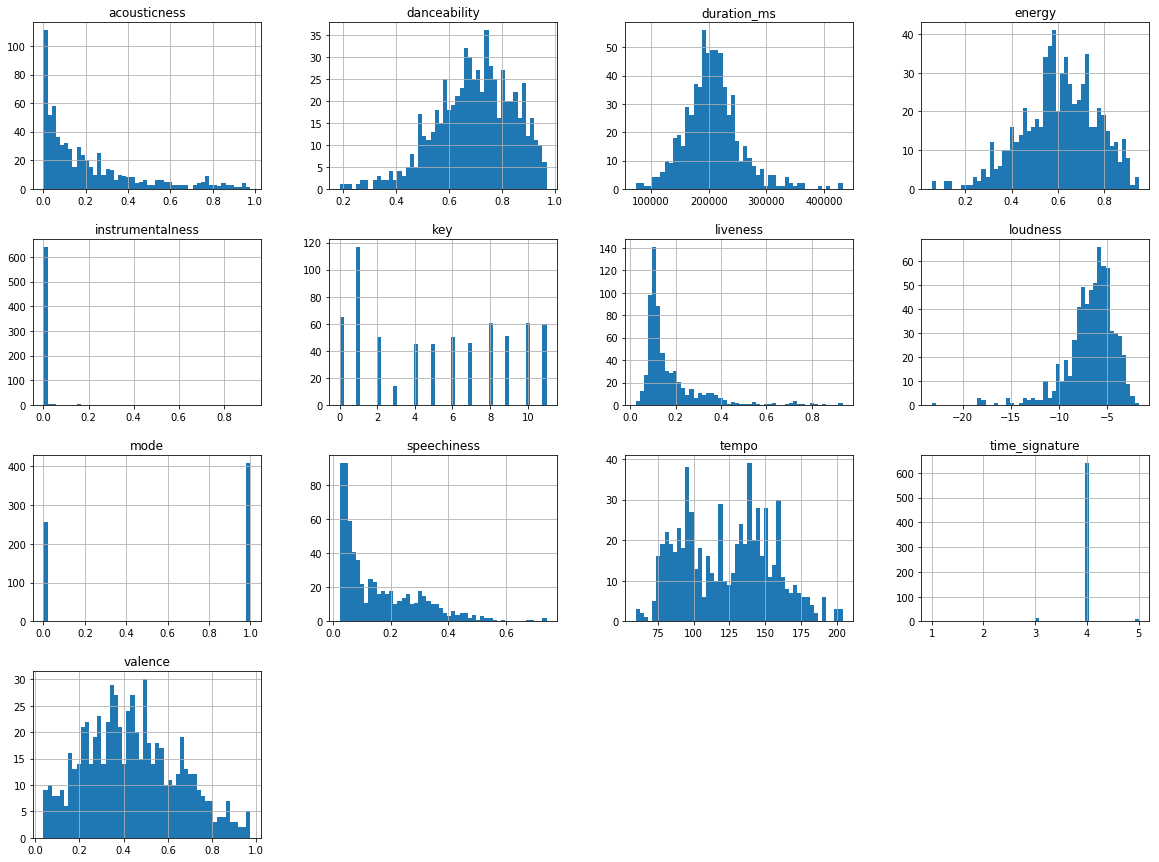

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
audioFeature1.hist(bins=50, figsize=(20,15))

plt.show()

In [ ]:
#string list to list
import ast
x = audioFeature1.genres[0]
x = ast.literal_eval(x)
x = [n.strip() for n in x]